In [217]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import linear_model
import matplotlib.pyplot as plt
import nltk as nltk
%matplotlib inline

#Import CSV files that contains each messages and rating from differnt groups of participants as a Pandas Dataframe
codings=pd.read_csv('data/batch_all.csv', index_col=0, parse_dates=True)
codings.head()

,Id,Request#,EN_1,EN_2,EN_3,EN_4,EN_5,EN_6,EN_7,EN_8,...,CH1800,CH1900,CH2000,CH2100,CH2200,CH2300,CH2400,CH2500,CH2600,CH2700
Num,,,,,,,,,,,,,,,,,,,,,
1,448758,Answered at <url>. Maybe you are not familiar ...,-10.0,NaN,NaN,NaN,NaN,-3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,367359,"Btw, ignoring the London stations it looks lik...",-7.0,NaN,NaN,NaN,NaN,-4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,622653,Because Wikipedia is an encylopaedia not a fre...,-12.0,NaN,NaN,NaN,NaN,-2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,350825,'Images with iconic status or historical impor...,-12.0,NaN,NaN,NaN,NaN,-8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,348828,May I also ask how CheckUser became involved i...,-11.0,NaN,NaN,NaN,NaN,-6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [219]:
headers=list(codings.columns.values)
print(headers)

['Id', 'Request#', 'EN_1', 'EN_2', 'EN_3', 'EN_4', 'EN_5', 'EN_6', 'EN_7', 'EN_8', 'EN_9', 'EN_10', 'EN_11', 'EN_12', 'EN_13', 'EN_14', 'EN_15', 'EN_16', 'EN_17', 'EN_18', 'EN_19', 'EN_20', 'EN_21', 'EN_22', 'EN_23', 'EN_24', 'EN_25', 'EN_26', 'EN_27', 'EN_28', 'EN_29', 'EN_30', 'EN_31', 'CH_1', 'CH_2', 'CH_3', 'CH_4', 'CH_5', 'CH_6', 'CH_7', 'CH_8', 'CH_9', 'CH_10', 'CH_11', 'CH_12', 'CH_13', 'CH_14', 'CH_15', 'CH_16', 'CH_17', 'CH_18', 'CH_19', 'CH_20', 'CH_21', 'CH_22', 'CH_23', 'EN_10.1', 'EN_20.1', 'EN_30.1', 'EN_40', 'EN_50', 'EN_60', 'EN_70', 'EN_80', 'EN_90', 'EN_100', 'EN_110', 'EN_120', 'EN_130', 'EN_140', 'EN_150', 'EN_160', 'EN_170', 'EN_180', 'EN_190', 'EN_200', 'EN_210', 'EN_220', 'EN_230', 'EN_240', 'EN_250', 'EN_260', 'EN_270', 'EN_280', 'EN_290', 'EN_300', 'EN_310', 'EN_320', 'EN_330', 'EN_340', 'EN_350', 'CH_10.1', 'CH_20.1', 'CH_30', 'CH_40', 'CH_50', 'CH_60', 'CH_70', 'CH_80', 'CH_90', 'CH_100', 'CH_110', 'CH_120', 'CH_130', 'CH_140', 'CH_150', 'CH_160', 'CH_170', '

In [221]:
#Split up the files by participants' language groups by the headers
en_headers=[]
ch_headers=[]

for h in headers:
    if h.startswith('EN'):
        en_headers.append(h)
    elif h.startswith('CH'):
        ch_headers.append(h)
print(en_headers, ch_headers)
print(len(en_headers)+len(ch_headers))

['EN_1', 'EN_2', 'EN_3', 'EN_4', 'EN_5', 'EN_6', 'EN_7', 'EN_8', 'EN_9', 'EN_10', 'EN_11', 'EN_12', 'EN_13', 'EN_14', 'EN_15', 'EN_16', 'EN_17', 'EN_18', 'EN_19', 'EN_20', 'EN_21', 'EN_22', 'EN_23', 'EN_24', 'EN_25', 'EN_26', 'EN_27', 'EN_28', 'EN_29', 'EN_30', 'EN_31', 'EN_10.1', 'EN_20.1', 'EN_30.1', 'EN_40', 'EN_50', 'EN_60', 'EN_70', 'EN_80', 'EN_90', 'EN_100', 'EN_110', 'EN_120', 'EN_130', 'EN_140', 'EN_150', 'EN_160', 'EN_170', 'EN_180', 'EN_190', 'EN_200', 'EN_210', 'EN_220', 'EN_230', 'EN_240', 'EN_250', 'EN_260', 'EN_270', 'EN_280', 'EN_290', 'EN_300', 'EN_310', 'EN_320', 'EN_330', 'EN_340', 'EN_350', 'EN100', 'EN200', 'EN300', 'EN400', 'EN500', 'EN600', 'EN700', 'EN800', 'EN900', 'EN1000', 'EN1100', 'EN1200', 'EN1300', 'EN1400', 'EN1500', 'EN1600', 'EN1700', 'EN1800', 'EN1900', 'EN2000', 'EN2100', 'EN2200', 'EN2300', 'EN2400'] ['CH_1', 'CH_2', 'CH_3', 'CH_4', 'CH_5', 'CH_6', 'CH_7', 'CH_8', 'CH_9', 'CH_10', 'CH_11', 'CH_12', 'CH_13', 'CH_14', 'CH_15', 'CH_16', 'CH_17', 'CH_18

In [223]:
#calculating z scores by individuals 

en_headers_zscore=[]
ch_headers_zscore=[]

for col in en_headers:
    col_zscore=col+'_zscore'
    codings[col_zscore]=(codings[col]-codings[col].mean())/codings[col].std(ddof=0)
    en_headers_zscore.append(col_zscore)
    

for col in ch_headers:
    col_zscore=col+'_zscore'
    codings[col_zscore]=(codings[col]-codings[col].mean())/codings[col].std(ddof=0)
    ch_headers_zscore.append(col_zscore)

# codings.columns.values

In [231]:
#make binary labels 
en_headers_binary=[]
ch_headers_binary=[]

for col in en_headers:
    col2=codings[col]
    col_list=[]
    for i in col2:
        if i>0:
            col_list.append(1)
        elif i<0:
            col_list.append(-1)
        else:
            col_list.append(i)
    
    col_binary=col+'_binary'
    codings[col_binary]=col_list
    en_headers_binary.append(col_binary)
    

for col in ch_headers:
    col2=codings[col]
    col_list=[]
    for i in col2:
        if i>0:
            col_list.append(1)
        elif i<0:
            col_list.append(-1)
        else:
            col_list.append(i)
    
    col_binary=col+'_binary'
    codings[col_binary]=col_list
    ch_headers_binary.append(col_binary)

In [232]:
print(len(en_headers), len(en_headers_zscore), len(en_headers_binary))
print(len(ch_headers), len(ch_headers_zscore), len(ch_headers_binary))

90 90 90
83 83 83


In [233]:
len(codings.columns.values)

521

In [237]:
codings['EN_orig_Mean'] =codings[en_headers].mean(axis=1, skipna=True)
codings['CH_orig_Mean'] =codings[ch_headers].mean(axis=1, skipna=True)
codings['EN_orig_std'] =codings[en_headers].std(axis=1, skipna=True)
codings['CH_orig_std'] =codings[ch_headers].std(axis=1, skipna=True)

In [291]:
def valuelist(header_name):
    ratings=codings[header_name].values.tolist()
    ratings1=[]
    for row in ratings:
        row=[r for r in row if str(r)!='nan']
        ratings1.append(row)
    return ratings1
    
codings['en_orig_ratings']=valuelist(en_headers)
codings['ch_orig_ratings']=valuelist(ch_headers)
codings['en_zcore_ratings']=valuelist(en_headers_zscore)
codings['ch_zscore_ratings']=valuelist(ch_headers_zscore)
codings['en_binary_ratings']=valuelist(en_headers_binary)
codings['ch_binary_ratings']=valuelist(ch_headers_binary)

In [295]:
# codings['ch_orig_ratings']
# codings['ch_binary_ratings']
# codings['ch_zscore_ratings']

In [296]:
codings['EN_z_Mean'] =codings[en_headers_zscore].mean(axis=1, skipna=True)
codings['CH_z_Mean'] =codings[ch_headers_zscore].mean(axis=1, skipna=True)
codings['EN_z_std'] =codings[en_headers_zscore].std(axis=1, skipna=True)
codings['CH_z_std'] =codings[ch_headers_zscore].std(axis=1, skipna=True)

In [299]:
codings['EN_binary_sum'] =codings[en_headers_binary].sum(axis=1, skipna=True)
codings['CH_binary_sum'] =codings[ch_headers_binary].sum(axis=1, skipna=True)
codings['EN_binary_Mean'] =codings[en_headers_binary].mean(axis=1, skipna=True)
codings['CH_binary_Mean'] =codings[ch_headers_binary].mean(axis=1, skipna=True)
# codings['EN_z_std'] =codings[en_headers_zscore].std(axis=1, skipna=True)
# codings['CH_z_std'] =codings[ch_headers_zscore].std(axis=1, skipna=True)

No handles with labels found to put in legend.


count    1000.000000
mean        0.898985
std         3.311949
min       -10.285714
25%        -1.148810
50%         1.222222
75%         3.093182
max        10.285714
Name: EN_orig_Mean, dtype: float64
count    1000.000000
mean        0.662623
std         3.001709
min        -8.750000
25%        -1.129464
50%         0.763889
75%         2.750000
max         8.166667
Name: CH_orig_Mean, dtype: float64
count    1000.000000
mean        3.633956
std         1.311389
min         0.000000
25%         2.732520
50%         3.603542
75%         4.437700
max         8.185353
Name: EN_orig_std, dtype: float64
count    1000.000000
mean        3.544375
std         1.382005
min         0.408248
25%         2.526519
50%         3.493872
75%         4.446284
max         8.111720
Name: CH_orig_std, dtype: float64


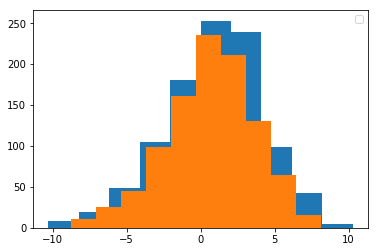

In [300]:
# codings[en_headers_binary].count()
codings[['EN_orig_std', 'CH_orig_std']]
print(codings['EN_orig_Mean'].describe())
print(codings['CH_orig_Mean'].describe())
print(codings['EN_orig_std'].describe())
print(codings['CH_orig_std'].describe())
# codings['EN_orig_Mean'].hist()
plt.hist(codings['EN_orig_Mean'])
plt.hist(codings['CH_orig_Mean'])
plt.legend()

In [306]:
print(codings['EN_z_Mean'].describe())
print(codings['CH_z_Mean'].describe())
print(codings['EN_z_std'].describe())
print(codings['CH_z_std'].describe())

count    1000.000000
mean        0.000210
std         0.708151
min        -2.337199
25%        -0.433194
50%         0.062384
75%         0.453964
max         1.913732
Name: EN_z_Mean, dtype: float64
count    1000.000000
mean       -0.005192
std         0.686076
min        -2.141374
25%        -0.394569
50%         0.024348
75%         0.452714
max         1.901872
Name: CH_z_Mean, dtype: float64
count    1000.000000
mean        0.716670
std         0.254020
min         0.093465
25%         0.539427
50%         0.694475
75%         0.854947
max         1.709719
Name: EN_z_std, dtype: float64
count    1000.000000
mean        0.728545
std         0.277529
min         0.072139
25%         0.528474
50%         0.705351
75%         0.892262
max         1.982402
Name: CH_z_std, dtype: float64


In [301]:
codings[['EN_binary_sum','CH_binary_sum', 'EN_binary_Mean', 'CH_binary_Mean' ]]

,EN_binary_sum,CH_binary_sum,EN_binary_Mean,CH_binary_Mean
Num,,,,
1,-3.0,1.0,-0.428571,0.200000
2,-2.0,2.0,-0.285714,0.500000
3,-7.0,-3.0,-1.000000,-0.600000
4,-7.0,-3.0,-1.000000,-0.600000
5,-1.0,3.0,-0.142857,0.600000
6,7.0,5.0,1.000000,1.000000
7,-3.0,-1.0,-0.428571,-0.250000
8,5.0,4.0,0.714286,0.800000
9,-7.0,-3.0,-1.000000,-0.600000


In [302]:
codings['EN_binary_1']=(codings[en_headers_binary]==1).sum(1)
codings['EN_binary_0']=(codings[en_headers_binary]==0).sum(1)
codings['EN_binary_-1']=(codings[en_headers_binary]==-1).sum(1)
codings['EN_ratings']=(codings[en_headers_binary]).count(axis=1)

In [303]:
codings[['EN_ratings', 'EN_binary_1', 'EN_binary_0', 'EN_binary_-1']]

,EN_ratings,EN_binary_1,EN_binary_0,EN_binary_-1
Num,,,,
1,7,2,0,5
2,7,1,3,3
3,7,0,0,7
4,7,0,0,7
5,7,3,0,4
6,7,7,0,0
7,7,0,4,3
8,7,5,2,0
9,7,0,0,7


In [304]:
codings['CH_binary_1']=(codings[ch_headers_binary]==1).sum(1)
codings['CH_binary_0']=(codings[ch_headers_binary]==0).sum(1)
codings['CH_binary_-1']=(codings[ch_headers_binary]==-1).sum(1)
codings['CH_ratings']=(codings[ch_headers_binary]).count(axis=1)

In [205]:
codings[['CH_ratings', 'CH_binary_1', 'CH_binary_0', 'CH_binary_-1']]

,CH_ratings,CH_binary_1,CH_binary_0,CH_binary_-1
Num,,,,
1,5,2,2,1
2,4,2,2,0
3,5,1,0,4
4,5,1,0,4
5,5,3,2,0
6,5,5,0,0
7,4,1,1,2
8,5,4,1,0
9,5,1,0,4


In [305]:
codings.to_csv("stat_only.csv")